Date
Jan-09    1.12
Jan-09    2.63
Jan-09    1.54
Jan-09    2.26
Jan-09    1.21
Jan-09    1.00
Jan-09    1.00
Jan-09    1.12
Jan-09    1.00
Jan-09    1.38
Jan-09    1.00
Jan-09    1.00
Jan-09    1.00
Jan-09    3.30
Jan-09    3.79
Jan-09    4.25
Jan-09    1.72
Jan-09    1.87
Jan-09    1.00
Jan-09    6.35
Name: NO, dtype: float64


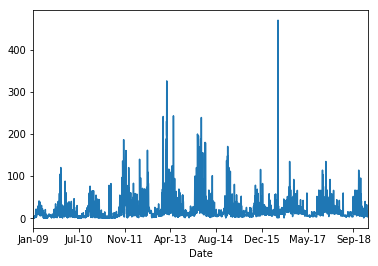

In [7]:
from sklearn import metrics
# line plot of time series
from pandas import Series
from matplotlib import pyplot
# load dataset
series = Series.from_csv("C:/Users/hp/Desktop/NOData.csv",encoding = "ISO-8859-1", header=0)
# display first few rows
print(series.head(20))
# line plot of dataset
series.plot()
pyplot.show()


In [8]:

# split the dataset
from pandas import Series
series = Series.from_csv("C:/Users/hp/Desktop/NOData.csv",encoding = "ISO-8859-1", header=0)
split_point = len(series) - 7
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Dataset 3653, Validation 7


In [9]:

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

In [10]:

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [11]:

from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# load dataset
series = Series.from_csv('dataset.csv', header=None)
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3288
Model:                     ARMA(7, 1)   Log Likelihood              -15883.833
Method:                       css-mle   S.D. of innovations             30.320
Date:                Sun, 05 May 2019   AIC                          31787.666
Time:                        16:17:29   BIC                          31848.646
Sample:                             0   HQIC                         31809.498
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2955      3.145      0.094      0.925      -5.868       6.459
ar.L1.y        1.4190      0.024     59.591      0.000       1.372       1.466
ar.L2.y       -0.3573      0.031    -11.481      0.0

In [12]:

# one-step out-of sample forecast
forecast = model_fit.forecast()[0]

In [13]:

forecast = inverse_difference(X, forecast, days_in_year)

In [14]:


from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load dataset
series = Series.from_csv('dataset.csv', header=None)
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)

Forecast: 1.661901


In [16]:
# next 3 days
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=3)[0]

In [17]:

# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

Day 1: 1.661901
Day 2: -2.447841
Day 3: 10.107236


In [20]:

from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load dataset
series = Series.from_csv('dataset.csv', header=None)
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=7)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

Day 1: 1.662136
Day 2: -2.447523
Day 3: 10.107600
Day 4: 8.181133
Day 5: 10.759378
Day 6: 13.226966
Day 7: 5.228736


In [21]:

# one-step out of sample forecast
start_index = len(differenced)
end_index = len(differenced)
forecast = model_fit.predict(start=start_index, end=end_index)

In [23]:

# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 6
forecast = model_fit.predict(start=start_index, end=end_index)

In [24]:
from statsmodels.tsa.arima_model import ARIMA
import numpy
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load dataset
series = Series.from_csv('dataset.csv', header=None)
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 6
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

Day 1: 1.661820
Day 2: -2.447966
Day 3: 10.107071
Day 4: 8.180536
Day 5: 10.758733
Day 6: 13.226255
Day 7: 5.227994
